<a href="https://colab.research.google.com/github/aniiirudhh/PortfolioProjects/blob/main/PropertyPredAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# /property_data_set.csv read this csv

df = pd.read_csv('/property_data_set.csv')
df.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,latitude,longitude,...,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,12.876174,77.596571,...,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,13.018444,77.678122,...,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,12.975072,77.665865,...,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,12.888169,77.591282,...,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,12.990243,77.712962,...,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [3]:
# unique columns

df.columns.unique()


Index(['property_id', 'type', 'activation_date', 'bathroom', 'floor',
       'total_floor', 'furnishing', 'gym', 'latitude', 'longitude',
       'lease_type', 'lift', 'locality', 'parking', 'property_age',
       'property_size', 'swimming_pool', 'pin_code', 'rent', 'deposit',
       'building_type'],
      dtype='object')

In [4]:
# drop latitude	longitude columns

df.drop(columns=['latitude', 'longitude'], axis=1, inplace=True)

In [5]:
df.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF


In [6]:
# seperate the activation_date by " " into new columns as act_date and act_time

df[['act_date', 'act_time']] = df['activation_date'].str.split(' ', 1, expand=True)


<ipython-input-6-288e222b8d78>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['act_date', 'act_time']] = df['activation_date'].str.split(' ', 1, expand=True)


In [7]:
df.head()

,property_id,type,activation_date,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,...,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,act_date,act_time
0,ff808081469fd6e20146a5af948000ea,BHK2,09-03-2017 14:36,1,3,4.0,SEMI_FURNISHED,1,FAMILY,1,...,BOTH,2,850,1,560076.0,12000,120000,AP,09-03-2017,14:36
1,ff8080814702d3d10147068359d200cd,BHK2,07-03-2017 12:02,2,4,11.0,SEMI_FURNISHED,1,FAMILY,1,...,BOTH,1,1233,1,560016.0,20000,150000,AP,07-03-2017,12:02
2,ff808081470c645401470fb03f5800a6,BHK2,10-03-2017 13:43,2,0,4.0,NOT_FURNISHED,1,ANYONE,1,...,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,10-03-2017,13:43
3,ff808081470c6454014715eaa5960281,BHK3,09-03-2017 22:16,2,3,4.0,SEMI_FURNISHED,0,ANYONE,0,...,BOTH,1,1300,0,560076.0,17000,150000,AP,09-03-2017,22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,15-03-2017 18:29,1,1,2.0,SEMI_FURNISHED,0,ANYONE,0,...,BOTH,4,450,0,560048.0,6500,40000,IF,15-03-2017,18:29


In [8]:
# drop activation_date

df.drop(columns=['activation_date'], axis=1, inplace=True)
df.head()


,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,act_date,act_time
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4.0,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,09-03-2017,14:36
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11.0,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,07-03-2017,12:02
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4.0,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,10-03-2017,13:43
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4.0,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP,09-03-2017,22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2.0,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF,15-03-2017,18:29


In [9]:
# change total_floor into string

df['total_floor'] = df['total_floor'].astype('str')

In [10]:
# seperate total_floor by "."

df['total_floor'] = df['total_floor'].str.split('.', expand=True)[0]


In [11]:
df.head()

,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,pin_code,rent,deposit,building_type,act_date,act_time
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,560076.0,12000,120000,AP,09-03-2017,14:36
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,560016.0,20000,150000,AP,07-03-2017,12:02
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,560075.0,15000,75000,AP,10-03-2017,13:43
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,560076.0,17000,150000,AP,09-03-2017,22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,560048.0,6500,40000,IF,15-03-2017,18:29


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_id    28888 non-null  object 
 1   type           28888 non-null  object 
 2   bathroom       28888 non-null  int64  
 3   floor          28888 non-null  int64  
 4   total_floor    28888 non-null  object 
 5   furnishing     28888 non-null  object 
 6   gym            28888 non-null  int64  
 7   lease_type     28888 non-null  object 
 8   lift           28888 non-null  int64  
 9   locality       28888 non-null  object 
 10  parking        28888 non-null  object 
 11  property_age   28888 non-null  int64  
 12  property_size  28888 non-null  int64  
 13  swimming_pool  28888 non-null  int64  
 14  pin_code       28563 non-null  float64
 15  rent           28888 non-null  int64  
 16  deposit        28888 non-null  int64  
 17  building_type  28809 non-null  object 
 18  act_da

In [13]:
# drop the column pin_code

df.drop(columns=['pin_code'], axis=1, inplace=True)
df.head()


,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,act_date,act_time
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,12000,120000,AP,09-03-2017,14:36
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,20000,150000,AP,07-03-2017,12:02
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017,13:43
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,17000,150000,AP,09-03-2017,22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,6500,40000,IF,15-03-2017,18:29


In [14]:
# seperate act_date column by "-" by new columns named Day Month Year

df[['Day', 'Month', 'Year']] = df['act_date'].str.split('-', 2, expand=True)

# Print the first five rows of the updated DataFrame
df.head()


<ipython-input-14-fe9d69083a2d>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['Day', 'Month', 'Year']] = df['act_date'].str.split('-', 2, expand=True)


,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,...,property_size,swimming_pool,rent,deposit,building_type,act_date,act_time,Day,Month,Year
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,...,850,1,12000,120000,AP,09-03-2017,14:36,09,03,2017
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,...,1233,1,20000,150000,AP,07-03-2017,12:02,07,03,2017
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,...,1200,0,15000,75000,AP,10-03-2017,13:43,10,03,2017
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,...,1300,0,17000,150000,AP,09-03-2017,22:16,09,03,2017
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,...,450,0,6500,40000,IF,15-03-2017,18:29,15,03,2017


In [15]:
# drop act_date

df.drop(columns=['act_date'], axis=1, inplace=True)
df.head()


,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,...,property_age,property_size,swimming_pool,rent,deposit,building_type,act_time,Day,Month,Year
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,...,2,850,1,12000,120000,AP,14:36,09,03,2017
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,...,1,1233,1,20000,150000,AP,12:02,07,03,2017
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,...,0,1200,0,15000,75000,AP,13:43,10,03,2017
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,...,1,1300,0,17000,150000,AP,22:16,09,03,2017
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,...,4,450,0,6500,40000,IF,18:29,15,03,2017


In [16]:
# check for null value counts

df.isnull().sum()


property_id       0
type              0
bathroom          0
floor             0
total_floor       0
furnishing        0
gym               0
lease_type        0
lift              0
locality          0
parking           0
property_age      0
property_size     0
swimming_pool     0
rent              0
deposit           0
building_type    79
act_time          0
Day               0
Month             0
Year              0
dtype: int64

In [17]:
# unique values in column floor

unique_floor_values = df['floor'].unique()
print(unique_floor_values)

[  3   4   0   1   2   6   5   8   7   9  10  14  17  11  19  12  13  15
  16  18  25  27  20  21 123  26  24  22  28]


In [18]:
unique_floor_values = df['total_floor'].unique()
print(unique_floor_values)

['4' '11' '2' '3' '5' '12' '1' '0' '9' 'nan' '6' '10' '14' '13' '7' '20'
 '17' '19' '8' '18' '15' '22' '30' '26' '23' '16' '21' '31' '35' '27' '24'
 '29' '28' '25' '32' '34' '38']


In [19]:
unique_lease_type_values = df['lease_type'].unique()
print(unique_lease_type_values)

['FAMILY' 'ANYONE' 'BACHELOR' 'COMPANY']


In [20]:
# unique count for lease_type

df['lease_type'].value_counts()

FAMILY      14885
ANYONE      12721
BACHELOR     1211
COMPANY        71
Name: lease_type, dtype: int64

In [21]:
df.head()

,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,...,property_age,property_size,swimming_pool,rent,deposit,building_type,act_time,Day,Month,Year
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,...,2,850,1,12000,120000,AP,14:36,09,03,2017
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,...,1,1233,1,20000,150000,AP,12:02,07,03,2017
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,...,0,1200,0,15000,75000,AP,13:43,10,03,2017
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,...,1,1300,0,17000,150000,AP,22:16,09,03,2017
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,...,4,450,0,6500,40000,IF,18:29,15,03,2017


In [22]:
# join column "Day" "Month" "Year" "act_time" in format of "DD-MM-YYYY HH:MM" as activation_time

df['activation_time'] = df['Day'] + '-' + df['Month'] + '-' + df['Year'] + ' ' + df['act_time']


In [23]:
df.head()

,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,...,property_size,swimming_pool,rent,deposit,building_type,act_time,Day,Month,Year,activation_time
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,...,850,1,12000,120000,AP,14:36,09,03,2017,09-03-2017 14:36
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,...,1233,1,20000,150000,AP,12:02,07,03,2017,07-03-2017 12:02
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,...,1200,0,15000,75000,AP,13:43,10,03,2017,10-03-2017 13:43
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,...,1300,0,17000,150000,AP,22:16,09,03,2017,09-03-2017 22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,...,450,0,6500,40000,IF,18:29,15,03,2017,15-03-2017 18:29


In [24]:
# drop Day Month Year act_time columns

df.drop(columns=['Day', 'Month', 'Year', 'act_time'], axis=1, inplace=True)
df.head()


,property_id,type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,12000,120000,AP,09-03-2017 14:36
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,20000,150000,AP,07-03-2017 12:02
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017 13:43
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,17000,150000,AP,09-03-2017 22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,6500,40000,IF,15-03-2017 18:29


<ipython-input-25-e4e6cff4df5c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[['type', 'total_floor', 'property_size', 'rent', 'deposit']].corr()


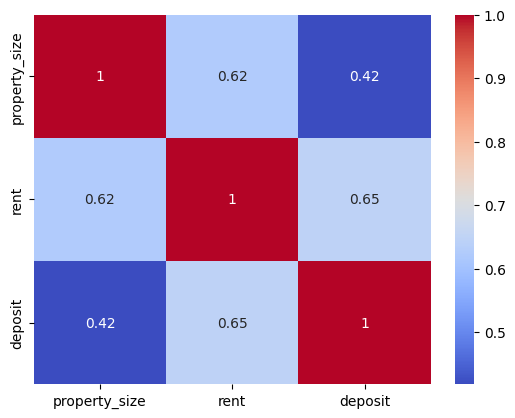

In [25]:
# Create a correlation matrix
correlation_matrix = df[['type', 'total_floor', 'property_size', 'rent', 'deposit']].corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


***BOXES***

Darker boxes mean stronger correlations.

Lighter boxes mean weaker or no correlations.

***Rent and Deposit***

The dark box between “Rent” and “Deposit” (0.65) shows they’re positively related.

When rent goes up, deposit tends to go up too.

***Property Size and Rent/Deposit***

Property size has moderate positive correlations with both rent (0.62) and deposit (0.42).

Bigger properties tend to have higher rent and deposit.

***Property Age: Not So Connected***

In [26]:
# change column name "type" to house_type

df.rename(columns={'type': 'house_type'}, inplace=True)


In [27]:
df.head()

,property_id,house_type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time
0,ff808081469fd6e20146a5af948000ea,BHK2,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,12000,120000,AP,09-03-2017 14:36
1,ff8080814702d3d10147068359d200cd,BHK2,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,20000,150000,AP,07-03-2017 12:02
2,ff808081470c645401470fb03f5800a6,BHK2,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017 13:43
3,ff808081470c6454014715eaa5960281,BHK3,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,17000,150000,AP,09-03-2017 22:16
4,ff808081474aa867014771a0298f0aa6,BHK1,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,6500,40000,IF,15-03-2017 18:29


In [28]:
# count of each unique values in building_type

building_type_counts = df['building_type'].value_counts()
print(building_type_counts)


IF    16557
AP    10193
IH     2059
Name: building_type, dtype: int64


the ***AP*** plays a critical role in ensuring the safety of higher-risk buildings, while building types define the construction characteristics of different structures.

Type ***I (IF)*** refers to fire-resistant construction. Buildings of this type are designed to withstand fire and heat for an extended period. They are commonly used for high-rise structures and other critical facilities.

***IH should double check***

We would like to drop the column ***building_type*** since we are predicting the number of ***interactions on a property*** but before that lets check the null values so we can make sure it doesnt impact the output

In [29]:
# check null values

df.isnull().sum()


property_id         0
house_type          0
bathroom            0
floor               0
total_floor         0
furnishing          0
gym                 0
lease_type          0
lift                0
locality            0
parking             0
property_age        0
property_size       0
swimming_pool       0
rent                0
deposit             0
building_type      79
activation_time     0
dtype: int64

***Reason to drop Building_type*** - it has Categorical values and does not affect the interaction since its values has no clear impact as compared to BHK or property_size (if in future we found it useful we can add it and see the model accuracy with mapping or encoding)

***Model Complexity*** -
since we want to efficiently predict and keep the model size smaller.

In [30]:
# get count values of unique values for "furnishing"

furnishing_counts = df['furnishing'].value_counts()
print(furnishing_counts)


SEMI_FURNISHED     22463
NOT_FURNISHED       4863
FULLY_FURNISHED     1562
Name: furnishing, dtype: int64


In [31]:
lease_counts = df['lease_type'].value_counts()
print(lease_counts)

FAMILY      14885
ANYONE      12721
BACHELOR     1211
COMPANY        71
Name: lease_type, dtype: int64


In [32]:
# unique values in house_type

unique_house_types = df['house_type'].unique()
print(unique_house_types)


['BHK2' 'BHK3' 'BHK1' 'RK1' 'BHK4' 'BHK4PLUS']


In [33]:
# map "house_type"

house_type_mapping = {
    'RK1': 1,
    'BHK1': 2,
    'BHK2': 3,
    'BHK3': 4,
    'BHK4': 5,
    'BHK4PLUS': 6
}

df['house_type'] = df['house_type'].map(house_type_mapping)

df.head()


,property_id,house_type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,12000,120000,AP,09-03-2017 14:36
1,ff8080814702d3d10147068359d200cd,3,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,20000,150000,AP,07-03-2017 12:02
2,ff808081470c645401470fb03f5800a6,3,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017 13:43
3,ff808081470c6454014715eaa5960281,4,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,17000,150000,AP,09-03-2017 22:16
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,6500,40000,IF,15-03-2017 18:29


***ONE HOT ENCODING FOR FURNISHING***

In [34]:
# do one hot coding for "furnishing"

furnishing_dummies = pd.get_dummies(df['furnishing'], drop_first=True)
df = pd.concat([df, furnishing_dummies], axis=1)
df.head()


,property_id,house_type,bathroom,floor,total_floor,furnishing,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,SEMI_FURNISHED,1,FAMILY,1,Hulimavu,BOTH,2,850,1,12000,120000,AP,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,SEMI_FURNISHED,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,20000,150000,AP,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,NOT_FURNISHED,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,SEMI_FURNISHED,0,ANYONE,0,Arakere,BOTH,1,1300,0,17000,150000,AP,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,SEMI_FURNISHED,0,ANYONE,0,Hoodi,BOTH,4,450,0,6500,40000,IF,15-03-2017 18:29,0,1


In [35]:
# drop "furnishing"

df.drop(columns=['furnishing'], axis=1, inplace=True)
df.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,1,FAMILY,1,Hulimavu,BOTH,2,850,1,12000,120000,AP,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,1,FAMILY,1,Ramamurthy Nagar,BOTH,1,1233,1,20000,150000,AP,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,1,ANYONE,1,GM Palya,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,0,ANYONE,0,Arakere,BOTH,1,1300,0,17000,150000,AP,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,0,ANYONE,0,Hoodi,BOTH,4,450,0,6500,40000,IF,15-03-2017 18:29,0,1


In [36]:
# unique values for total_floor

unique_floor_values = df['total_floor'].unique()
print(unique_floor_values)

['4' '11' '2' '3' '5' '12' '1' '0' '9' 'nan' '6' '10' '14' '13' '7' '20'
 '17' '19' '8' '18' '15' '22' '30' '26' '23' '16' '21' '31' '35' '27' '24'
 '29' '28' '25' '32' '34' '38']


***HANDLING NAN VALUES***

In [37]:
# handle nan value in "total_floor"

# Fill missing values in "total_floor" with the median
df['total_floor'] = df['total_floor'].fillna(df['total_floor'].median())

In [38]:
# unique values for locality

locality_values = df['locality'].unique()
print(locality_values)


['Hulimavu' 'Ramamurthy Nagar' 'GM Palya' ... 'BTM Layout 1 stage'
 'Kammanahalli,Banswadi' 'Hosakote']


In [39]:
# count number of unique values for locality

unique_locality_count = len(locality_values)
print(f"Number of unique values for locality: {unique_locality_count}")


Number of unique values for locality: 2368


***TARGET ENCODING FOR LOCALITY***

In [40]:
# use target encoding in "locality" column
!pip install category_encoders

from category_encoders import TargetEncoder


# Create a TargetEncoder object
target_encoder = TargetEncoder()

# Fit the encoder on the "locality" column
target_encoder.fit(df["locality"], df["rent"])

# Transform the "locality" column using the encoder
df["locality"] = target_encoder.transform(df["locality"])

# Print the first five rows of the transformed DataFrame
df.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,1,FAMILY,1,14325.728156,BOTH,2,850,1,12000,120000,AP,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,1,FAMILY,1,11552.490421,BOTH,1,1233,1,20000,150000,AP,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,1,ANYONE,1,14956.064210,FOUR_WHEELER,0,1200,0,15000,75000,AP,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,0,ANYONE,0,14818.874624,BOTH,1,1300,0,17000,150000,AP,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,0,ANYONE,0,18661.913732,BOTH,4,450,0,6500,40000,IF,15-03-2017 18:29,0,1


***CORRELATION BETWEEN RENT AND LOCALITY***

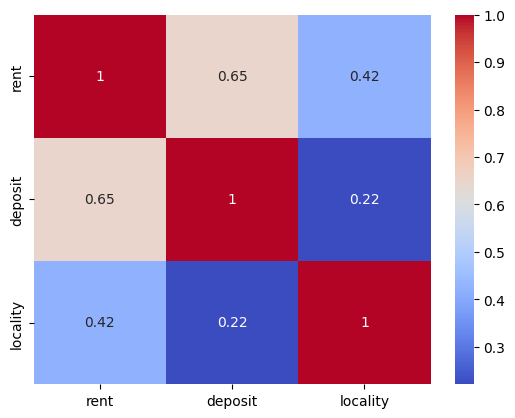

In [41]:
# plot corr between rent deposit and locality

import matplotlib.pyplot as plt
import seaborn as sns

# Select relevant columns
df_subset = df[['rent', 'deposit', 'locality']]

# Calculate correlations
correlation_matrix = df_subset.corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Display the heatmap
plt.show()


***There is a correlation between locality and rent/deposit***

In [42]:
# unique values for parking

unique_parking_values = df['parking'].unique()
print(unique_parking_values)


['BOTH' 'FOUR_WHEELER' 'TWO_WHEELER' 'NONE']


In [43]:
# use label encoding for parking column
# none as 0
# TWO_WHEELER as 1
# FOUR_WHEELER as 2
# BOTH as 3

parking_mapping = {
    'none': 0,
    'TWO_WHEELER': 1,
    'FOUR_WHEELER': 2,
    'BOTH': 3
}

df['parking'] = df['parking'].map(parking_mapping)


In [44]:
df.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,1,FAMILY,1,14325.728156,3.0,2,850,1,12000,120000,AP,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,1,FAMILY,1,11552.490421,3.0,1,1233,1,20000,150000,AP,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,1,ANYONE,1,14956.064210,2.0,0,1200,0,15000,75000,AP,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,0,ANYONE,0,14818.874624,3.0,1,1300,0,17000,150000,AP,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,0,ANYONE,0,18661.913732,3.0,4,450,0,6500,40000,IF,15-03-2017 18:29,0,1


In [45]:
df['parking'].value_counts(dropna=False)

3.0    13809
1.0    12806
NaN     1277
2.0      996
Name: parking, dtype: int64

In [46]:
df['parking'] = df['parking'].fillna(0).astype('int32')
df.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,1,FAMILY,1,14325.728156,3,2,850,1,12000,120000,AP,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,1,FAMILY,1,11552.490421,3,1,1233,1,20000,150000,AP,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,1,ANYONE,1,14956.064210,2,0,1200,0,15000,75000,AP,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,0,ANYONE,0,14818.874624,3,1,1300,0,17000,150000,AP,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,0,ANYONE,0,18661.913732,3,4,450,0,6500,40000,IF,15-03-2017 18:29,0,1


In [47]:
# unique value in lease_type

unique_lease_type_values = df['lease_type'].unique()
print(unique_lease_type_values)


['FAMILY' 'ANYONE' 'BACHELOR' 'COMPANY']


In [48]:
# label encode lease_type

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on the "lease_type" column
label_encoder.fit(df["lease_type"])

# Transform the "lease_type" column using the encoder
df["lease_type"] = label_encoder.transform(df["lease_type"])

# Print the first five rows of the transformed DataFrame
df.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,building_type,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,1,3,1,14325.728156,3,2,850,1,12000,120000,AP,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,1,3,1,11552.490421,3,1,1233,1,20000,150000,AP,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,1,0,1,14956.064210,2,0,1200,0,15000,75000,AP,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,0,0,0,14818.874624,3,1,1300,0,17000,150000,AP,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,0,0,0,18661.913732,3,4,450,0,6500,40000,IF,15-03-2017 18:29,0,1


In [49]:
# drop building_type

df.drop(columns=['building_type'], axis=1, inplace=True)


In [50]:
df.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,4,1,3,1,14325.728156,3,2,850,1,12000,120000,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,11,1,3,1,11552.490421,3,1,1233,1,20000,150000,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,4,1,0,1,14956.064210,2,0,1200,0,15000,75000,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,4,0,0,0,14818.874624,3,1,1300,0,17000,150000,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,2,0,0,0,18661.913732,3,4,450,0,6500,40000,15-03-2017 18:29,0,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      28888 non-null  object 
 1   house_type       28888 non-null  int64  
 2   bathroom         28888 non-null  int64  
 3   floor            28888 non-null  int64  
 4   total_floor      28888 non-null  object 
 5   gym              28888 non-null  int64  
 6   lease_type       28888 non-null  int64  
 7   lift             28888 non-null  int64  
 8   locality         28888 non-null  float64
 9   parking          28888 non-null  int32  
 10  property_age     28888 non-null  int64  
 11  property_size    28888 non-null  int64  
 12  swimming_pool    28888 non-null  int64  
 13  rent             28888 non-null  int64  
 14  deposit          28888 non-null  int64  
 15  activation_time  28888 non-null  object 
 16  NOT_FURNISHED    28888 non-null  uint8  
 17  SEMI_FURNISH

In [52]:
# handle nan in total_floor

# Fill missing values in "total_floor" with the median
df['total_floor'] = df['total_floor'].fillna(df['total_floor'].median())


In [53]:
df['total_floor'].isnull().sum()

0

In [54]:
df['total_floor'].fillna(0, inplace=True)

In [55]:
df['total_floor'].dtype

dtype('O')

In [56]:
# label encode total_floor

from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the encoder to the "total_floor" column
le.fit(df["total_floor"])

# Transform the "total_floor" column using the encoder
df["total_floor"] = le.transform(df["total_floor"])

# Print the first five rows of the transformed DataFrame
df.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,09-03-2017 14:36,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,07-03-2017 12:02,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,30,1,0,1,14956.064210,2,0,1200,0,15000,75000,10-03-2017 13:43,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,30,0,0,0,14818.874624,3,1,1300,0,17000,150000,09-03-2017 22:16,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,12,0,0,0,18661.913732,3,4,450,0,6500,40000,15-03-2017 18:29,0,1


In [57]:
df['total_floor'].dtype

dtype('int64')

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28888 entries, 0 to 28887
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_id      28888 non-null  object 
 1   house_type       28888 non-null  int64  
 2   bathroom         28888 non-null  int64  
 3   floor            28888 non-null  int64  
 4   total_floor      28888 non-null  int64  
 5   gym              28888 non-null  int64  
 6   lease_type       28888 non-null  int64  
 7   lift             28888 non-null  int64  
 8   locality         28888 non-null  float64
 9   parking          28888 non-null  int32  
 10  property_age     28888 non-null  int64  
 11  property_size    28888 non-null  int64  
 12  swimming_pool    28888 non-null  int64  
 13  rent             28888 non-null  int64  
 14  deposit          28888 non-null  int64  
 15  activation_time  28888 non-null  object 
 16  NOT_FURNISHED    28888 non-null  uint8  
 17  SEMI_FURNISH

In [59]:
# activation_time into datetime type

df['activation_time'] = pd.to_datetime(df['activation_time'])


In [60]:
df.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1
1,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1
2,ff808081470c645401470fb03f5800a6,3,2,0,30,1,0,1,14956.064210,2,0,1200,0,15000,75000,2017-10-03 13:43:00,1,0
3,ff808081470c6454014715eaa5960281,4,2,3,30,0,0,0,14818.874624,3,1,1300,0,17000,150000,2017-09-03 22:16:00,0,1
4,ff808081474aa867014771a0298f0aa6,2,1,1,12,0,0,0,18661.913732,3,4,450,0,6500,40000,2017-03-15 18:29:00,0,1


<Axes: xlabel='total_floor'>

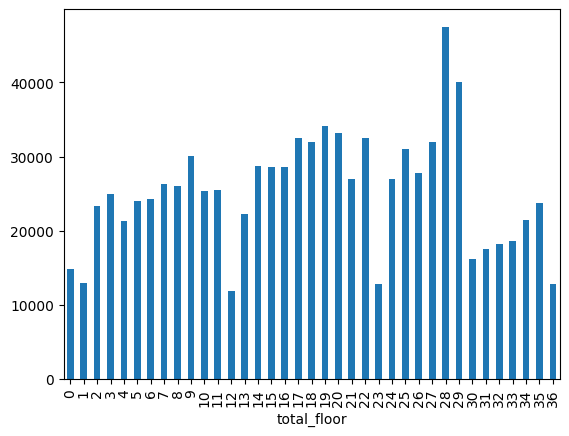

In [61]:
# @title Average Rent vs Total Floors

df.groupby('total_floor')['rent'].mean().plot(kind='bar')

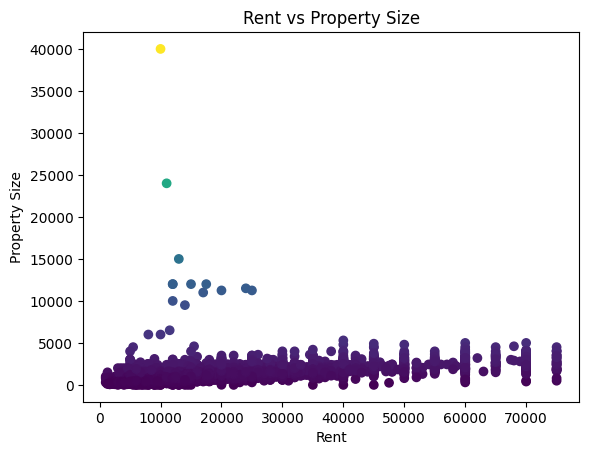

In [62]:
# @title Rent vs Property Size

import matplotlib.pyplot as plt
plt.scatter(df['rent'], df['property_size'], c=df['property_size'])
plt.title('Rent vs Property Size')
plt.xlabel('Rent')
_ = plt.ylabel('Property Size')

# ***ALL IMPORTANT STEPS TO CLEAN PROPERTY DATA SET ARE COMPLETED***

# ***LOADING PROPERTY INTERACTION DATASET IN DF2***

In [63]:
# load this dataset (/property_interactions.csv) in df2

df2 = pd.read_csv('/property_interactions.csv')
df2.head()

,property_id,request_date
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15


In [64]:
df2.info(())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170611 entries, 0 to 170610
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   property_id   170611 non-null  object
 1   request_date  170611 non-null  object
dtypes: object(2)
memory usage: 2.6+ MB


In [80]:
# show number of times each property_id was called and print top 20 property_id

property_id_counts = df2['property_id'].value_counts()
print(property_id_counts.head(20))


ff80818159e061800159e4614bf4368d    193
ff8081815ae03cc6015aeb9caaf065ee    183
ff80818159c49a360159c600065a0c66    168
ff8081815a8d7af5015a8d85892d05ef    165
ff80818156b651790156b6cb4b360940    145
ff8081815828c24501582971716923c1    143
ff808181538a91db015394345f8d0333    136
ff8081815a5ee636015a5f0e1da6260b    133
ff8081815925425d015926094bb22f2b    128
ff808181585a428301585bf8d4110d03    127
ff8081815703739d015704856c2e3f8a    125
ff8081815ab73cb4015ab7d4d3a221d9    124
ff8081814fe05982014fe4adb922149f    124
ff80818159fa0f0f0159febbd5c564f8    119
ff8081815ae03e01015ae6e0940964bb    119
ff808181590706590159074396c30c60    117
ff80818159a67e0d0159a777d77718e2    113
ff8081815235ebc3015235f85aaf0083    111
ff8081815a04283e015a07e771f4031c    110
ff80818159fa0f0f015a034f9d3c4e8a    110
Name: property_id, dtype: int64


In [85]:
# number of times each property_id was called create a new column that shows the count of the property with property_id and request_time

df2['count'] = df2.groupby('property_id').transform('count')
df2.head()

,property_id,request_date,count
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,4
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,4
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,4
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,4
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,12


In [86]:
# request_date as datetime type

df2['request_date'] = pd.to_datetime(df2['request_date'])


In [87]:
df2.head()

,property_id,request_date,count
0,ff808081469fd6e20146a5af948000ea,2017-03-10 17:42:34,4
1,ff808081469fd6e20146a5af948000ea,2017-03-09 15:51:17,4
2,ff808081469fd6e20146a5af948000ea,2017-03-10 17:30:22,4
3,ff808081469fd6e20146a5af948000ea,2017-03-11 17:48:46,4
4,ff8080814702d3d10147068359d200cd,2017-03-30 19:59:15,12


# ***PROPERTY INTERACTION DATASET NOW HAS A NEW COUNT COLUMN IT TELLS HOW MANY TIMES THE PROPERTY WAS CALLED FOR***

In [89]:
# merge df and df2 from left on property_id

df3 = pd.merge(left=df, right=df2, how='left', on='property_id')
df3.head(10)


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED,request_date,count
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:42:34,4.0
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-09 15:51:17,4.0
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:30:22,4.0
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-11 17:48:46,4.0
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-30 19:59:15,12.0
5,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-13 00:18:47,12.0
6,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-18 22:54:01,12.0
7,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-14 19:04:26,12.0
8,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-18 13:38:11,12.0
9,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-28 09:57:10,12.0


In [91]:
# null values in count

df3['count'].isnull().sum()


6109

In [92]:
# unique values in count

df3['count'].unique()


array([  4.,  12.,  27.,  13.,  68.,   3.,   9.,   8.,  60.,   1.,  30.,
         5.,   2.,  10.,  nan,  21.,  18.,  15.,  41.,   7.,  31.,  14.,
        11.,  29.,  61.,  16.,  44.,   6.,  17.,  19.,  20.,  39.,  45.,
        67.,  42.,  28.,  43.,  37., 109.,  22.,  51.,  25.,  23.,  64.,
        50.,  74.,  34.,  33.,  47.,  36.,  69.,  49.,  70.,  26.,  24.,
        32.,  38.,  98.,  62.,  40.,  48., 124.,  46.,  35.,  57.,  66.,
        89.,  56.,  59., 102., 111.,  52.,  73.,  54.,  86.,  53.,  95.,
       136.,  94.,  91.,  99.,  80.,  65.,  78.,  83.,  93.,  63.,  71.,
       103., 145., 125.,  55., 143., 127.,  84.,  58.,  81.,  92., 117.,
       128., 113., 168.,  76., 193., 119., 110.,  75., 108.,  82., 133.,
        85., 101., 165.,  72., 104., 183.])

In [93]:
# handle nan value in count

df3['count'] = df3['count'].fillna(0)

In [95]:
# change count as int type

df3['count'] = df3['count'].astype('int32')


In [96]:
df3.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED,request_date,count
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:42:34,4
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-09 15:51:17,4
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:30:22,4
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-11 17:48:46,4
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-30 19:59:15,12


# ***NOW THAT WE HAVE ACTIVATION TIME AND REQUEST TIME WE CAN FIND OUT HOW MANY DAYS/HOURS AFTER THE PROPERTY IS POSTED GOT AN INTERACTION***

In [97]:
# difference between activation_time and request_date to a new column "int_time"

df3['int_time'] = df3['request_date'] - df3['activation_time']
df3.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,...,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED,request_date,count,int_time
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:42:34,4,-177 days +03:06:34
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-09 15:51:17,4,-178 days +01:15:17
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:30:22,4,-177 days +02:54:22
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-11 17:48:46,4,-176 days +03:12:46
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,...,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-30 19:59:15,12,-95 days +07:57:15


In [99]:
df3.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,...,property_size,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED,request_date,count,int_time
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:42:34,4,-177 days +03:06:34
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-09 15:51:17,4,-178 days +01:15:17
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:30:22,4,-177 days +02:54:22
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,850,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-11 17:48:46,4,-176 days +03:12:46
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,...,1233,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-30 19:59:15,12,-95 days +07:57:15


# ***NOW THAT WE HAVE DAYS AND HOURS FOR EVERY PROPERTY AND NUMBER OF TIMES IT RECIVED A REQUEST/CALL WE CAN MOVE TO PROPERTY PHOTOS***

# ***DATASET 3 - PROPERTY PHOTOS***
They have broken JSON in form of pictures so well discuss by taking a look at the dataset in df4

In [190]:
# read tsv file (/property_photos.tsv) as df4

df4 = pd.read_table("/property_photos.tsv")
df4.head()


,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title\"":\""Balcony\"",\""name\"":\""IMG_20131006..."
1,ff8080814702d3d10147068359d200cd,NaN
2,ff808081470c645401470fb03f5800a6,"[{\title\"":\""Bedroom\"",\""name\"":\""ff808081470c..."
3,ff808081470c6454014715eaa5960281,"[{\title\"":\""Bedroom\"",\""name\"":\""Screenshot_7..."
4,ff808081474aa867014771a0298f0aa6,"[{\title\"":\""Other\"",\""name\"":\""ff808081474aa8..."


In [191]:
# photo_urls as string type

df4['photo_urls'] = df4['photo_urls'].astype(str)


In [192]:
# There is a missing “ before ‘title’ for the first json
# object in each value. There is also an additional “ at the end of each value. Also you
# must remove all the \\ to get a valid json representation.

df4['photo_urls'] = df4['photo_urls'].apply(lambda x: x.replace('\\"', '"').replace('"', '', 1).replace('"', '', -1))


In [193]:
df4.head()

,property_id,photo_urls
0,ff808081469fd6e20146a5af948000ea,"[{\title:Balcony,name:IMG_20131006_120837.jpg,..."
1,ff8080814702d3d10147068359d200cd,nan
2,ff808081470c645401470fb03f5800a6,"[{\title:Bedroom,name:ff808081470c645401470fb0..."
3,ff808081470c6454014715eaa5960281,"[{\title:Bedroom,name:Screenshot_7.jpg,imagesM..."
4,ff808081474aa867014771a0298f0aa6,"[{\title:Other,name:ff808081474aa867014771a029..."


# ***NOW AFTER REMOVING " AND \ \  FROM JSON STRING WE GET NUMBER OF PHOTOS FOR EACH PROPERTY***

In [206]:
df4.head(20)

,property_id,photo_urls,photo_count
0,ff808081469fd6e20146a5af948000ea,"[{\title:Balcony, name:IMG_20131006_120837.jpg...",49
1,ff8080814702d3d10147068359d200cd,[a],1
2,ff808081470c645401470fb03f5800a6,"[{\title:Bedroom, name:ff808081470c645401470fb...",84
3,ff808081470c6454014715eaa5960281,"[{\title:Bedroom, name:Screenshot_7.jpg, image...",63
4,ff808081474aa867014771a0298f0aa6,"[{\title:Other, name:ff808081474aa867014771a02...",49
5,ff8080814780f30801478d14132f03f4,"[{\title:, name:files[], imagesMap:{large:ff80...",21
6,ff8080814780f308014797c79000082e,"[{\title:Bedroom, name:Screenshot_4.jpg, image...",35
7,ff80808147a95f0a0147ab0d88fa0080,"[{\title:Bedroom, name:Screenshot_5.jpg, image...",42
8,ff80808147ac6af10147afc279480099,"[{\title:, name:files[], imagesMap:{thumbnail:...",84
9,ff80808147cbdc2a0147cf8577880153,"[{\title:, name:files[], imagesMap:{medium:ff8...",21


In [308]:
# merge df4 and df3 over property_id using left join

df5 = pd.merge(left=df3, right=df4, how='left', on='property_id')
df5.head()

,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,...,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED,request_date,count,int_time,photo_urls,photo_count
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:42:34,4,-177 days +03:06:34,"[{\title:Balcony, name:IMG_20131006_120837.jpg...",49
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,12000,120000,2017-09-03 14:36:00,0,1,2017-03-09 15:51:17,4,-178 days +01:15:17,"[{\title:Balcony, name:IMG_20131006_120837.jpg...",49
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:30:22,4,-177 days +02:54:22,"[{\title:Balcony, name:IMG_20131006_120837.jpg...",49
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,12000,120000,2017-09-03 14:36:00,0,1,2017-03-11 17:48:46,4,-176 days +03:12:46,"[{\title:Balcony, name:IMG_20131006_120837.jpg...",49
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,...,20000,150000,2017-07-03 12:02:00,0,1,2017-03-30 19:59:15,12,-95 days +07:57:15,[a],1


In [309]:
# drop photo_url

df5.drop(columns=['photo_urls'], axis=1, inplace=True)
df5.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,...,swimming_pool,rent,deposit,activation_time,NOT_FURNISHED,SEMI_FURNISHED,request_date,count,int_time,photo_count
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:42:34,4,-177 days +03:06:34,49
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-09 15:51:17,4,-178 days +01:15:17,49
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-10 17:30:22,4,-177 days +02:54:22,49
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,...,1,12000,120000,2017-09-03 14:36:00,0,1,2017-03-11 17:48:46,4,-176 days +03:12:46,49
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,...,1,20000,150000,2017-07-03 12:02:00,0,1,2017-03-30 19:59:15,12,-95 days +07:57:15,1


In [310]:
# drop activation_time request_date

df5.drop(columns=['activation_time', 'request_date'], axis=1, inplace=True)
df5.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,locality,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,int_time,photo_count
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,0,1,4,-177 days +03:06:34,49
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,0,1,4,-178 days +01:15:17,49
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,0,1,4,-177 days +02:54:22,49
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,14325.728156,3,2,850,1,12000,120000,0,1,4,-176 days +03:12:46,49
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,11552.490421,3,1,1233,1,20000,150000,0,1,12,-95 days +07:57:15,1


In [311]:
# drop locality

df5.drop(columns=['locality'], axis=1, inplace=True)
df5.head()


,property_id,house_type,bathroom,floor,total_floor,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,int_time,photo_count
0,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-177 days +03:06:34,49
1,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-178 days +01:15:17,49
2,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-177 days +02:54:22,49
3,ff808081469fd6e20146a5af948000ea,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-176 days +03:12:46,49
4,ff8080814702d3d10147068359d200cd,3,2,4,3,1,3,1,3,1,1233,1,20000,150000,0,1,12,-95 days +07:57:15,1


In [312]:
# drop property_id

df5.drop(columns=['property_id'], axis=1, inplace=True)
df5.head()


,house_type,bathroom,floor,total_floor,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,int_time,photo_count
0,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-177 days +03:06:34,49
1,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-178 days +01:15:17,49
2,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-177 days +02:54:22,49
3,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-176 days +03:12:46,49
4,3,2,4,3,1,3,1,3,1,1233,1,20000,150000,0,1,12,-95 days +07:57:15,1


In [313]:
# int_time as string

df5['int_time'] = df5['int_time'].astype(str)


In [314]:
# seperate int_time by days as "days" and "time"

df5['days'] = df5['int_time'].str.split(' days', 1, expand=True)[0]
df5['time'] = df5['int_time'].str.split(' days', 1, expand=True)[1]


<ipython-input-314-7d9ea776a4d6>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df5['days'] = df5['int_time'].str.split(' days', 1, expand=True)[0]
<ipython-input-314-7d9ea776a4d6>:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df5['time'] = df5['int_time'].str.split(' days', 1, expand=True)[1]


In [315]:
df5.head()

,house_type,bathroom,floor,total_floor,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,int_time,photo_count,days,time
0,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-177 days +03:06:34,49,-177,+03:06:34
1,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-178 days +01:15:17,49,-178,+01:15:17
2,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-177 days +02:54:22,49,-177,+02:54:22
3,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,-176 days +03:12:46,49,-176,+03:12:46
4,3,2,4,3,1,3,1,3,1,1233,1,20000,150000,0,1,12,-95 days +07:57:15,1,-95,+07:57:15


In [316]:
# drop int_time

df5.drop(columns=['int_time'], axis=1, inplace=True)


In [317]:
# removing - from days

df5['days'] = df5['days'].str.replace('-', '')


In [318]:
df5.head()

,house_type,bathroom,floor,total_floor,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,photo_count,days,time
0,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,177,+03:06:34
1,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,178,+01:15:17
2,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,177,+02:54:22
3,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,176,+03:12:46
4,3,2,4,3,1,3,1,3,1,1233,1,20000,150000,0,1,12,1,95,+07:57:15


In [319]:
# check null values

df5.isnull().sum()


house_type           0
bathroom             0
floor                0
total_floor          0
gym                  0
lease_type           0
lift                 0
parking              0
property_age         0
property_size        0
swimming_pool        0
rent                 0
deposit              0
NOT_FURNISHED        0
SEMI_FURNISHED       0
count                0
photo_count          0
days                 0
time              6109
dtype: int64

In [320]:
# drop time

df5.drop(columns=['time'], axis=1, inplace=True)


In [321]:
df5.head()

,house_type,bathroom,floor,total_floor,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,photo_count,days
0,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,177
1,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,178
2,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,177
3,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,176
4,3,2,4,3,1,3,1,3,1,1233,1,20000,150000,0,1,12,1,95


<ipython-input-322-d60e9a398f5f>:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df5.corr()


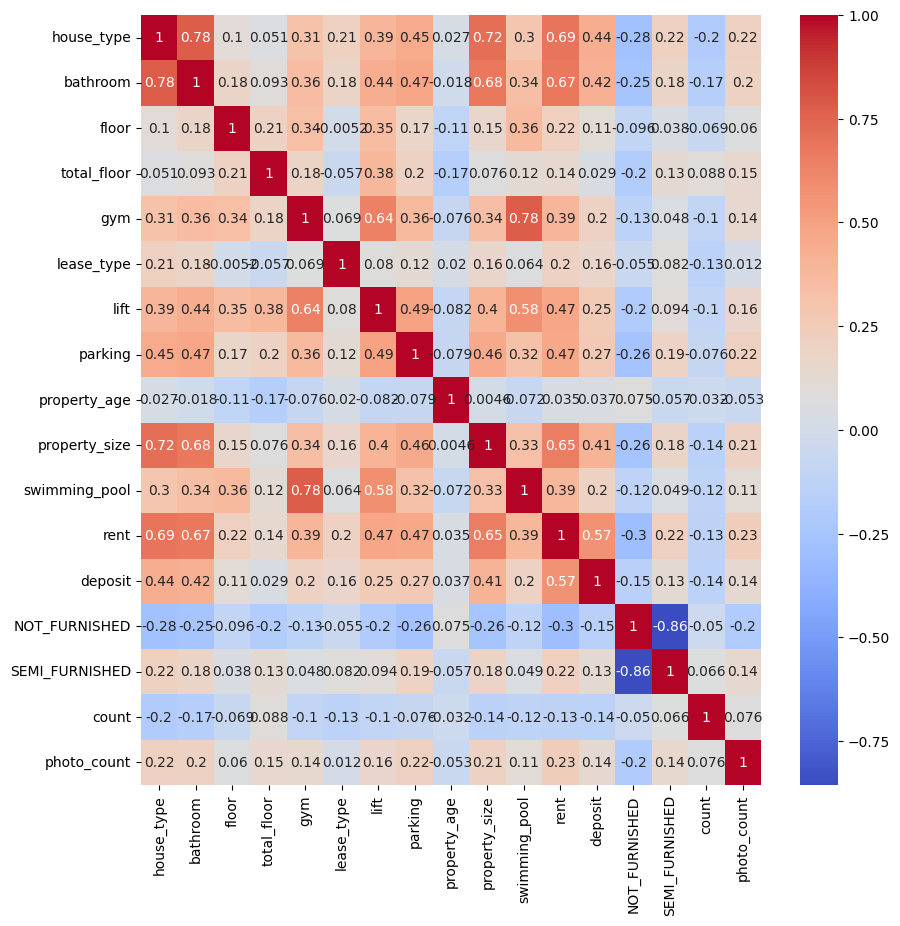

In [322]:
# corr matrix

import matplotlib.pyplot as plt
import seaborn as sns

# Get the correlation matrix
correlation_matrix = df5.corr()

# Set the figure size
plt.figure(figsize=(10, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()


In [323]:
df5['days'] = pd.to_numeric(df5['days'], errors='coerce')

In [324]:
df5['days'].fillna(0, inplace=True)

In [325]:
df5['days'] = df5['days'].astype('int32')

In [330]:
df.head()

,house_type,bathroom,floor,total_floor,gym,lease_type,lift,parking,property_age,property_size,swimming_pool,rent,deposit,NOT_FURNISHED,SEMI_FURNISHED,count,photo_count,days
0,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,177
1,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,178
2,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,177
3,3,1,3,30,1,3,1,3,2,850,1,12000,120000,0,1,4,49,176
4,3,2,4,3,1,3,1,3,1,1233,1,20000,150000,0,1,12,1,95


# ***USING LINEAR REGRESSION***

In [349]:
#Using LR
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the data
df5 = pd.read_csv('/Final.csv')

# Select features and target variable
X = df5[['house_type', 'bathroom', 'floor', 'total_floor', 'gym', 'lease_type', 'lift', 'parking', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'NOT_FURNISHED', 'SEMI_FURNISHED', 'count', 'photo_count','days']]
y = df5['count']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)



In [356]:
# we would like to predict the number of interactions that a property would
# receive within 3 days of its activation and 7 days of its activation.

# Select data for properties activated within the last 3 days
recent_activations = df5[df5['days'] <= 3]

# Select features and target variable
X_recent = recent_activations[['house_type', 'bathroom', 'floor', 'total_floor', 'gym', 'lease_type', 'lift', 'parking', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'NOT_FURNISHED', 'SEMI_FURNISHED', 'count', 'photo_count','days']]
y_recent = recent_activations['count']

# Train a linear regression model
model_recent = LinearRegression()
model_recent.fit(X_recent, y_recent)

# Predict the number of interactions within 3 days for new data
new_data_3days = X_test.head(10)
predictions_3days = model_recent.predict(new_data_3days)

# Select data for properties activated within the last 7 days
recent_activations_7days = df5[df5['days'] <= 7]

# Select features and target variable
X_recent_7days = recent_activations_7days[['house_type', 'bathroom', 'floor', 'total_floor', 'gym', 'lease_type', 'lift', 'parking', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'NOT_FURNISHED', 'SEMI_FURNISHED', 'count', 'photo_count','days']]
y_recent_7days = recent_activations_7days['count']

# Train a linear regression model
model_recent_7days = LinearRegression()
model_recent_7days.fit(X_recent_7days, y_recent_7days)

# Predict the number of interactions within 7 days for new data
new_data_7days = X_test.head(10)
predictions_7days = model_recent_7days.predict(new_data_7days)

# Print the predictions
print("Predictions for 3 days:", predictions_3days)
print("Predictions for 7 days:", predictions_7days)


Predictions for 3 days: [18. 18.  7. 22. 39.  3.  6. 19.  9. 60.]
Predictions for 7 days: [18. 18.  7. 22. 39.  3.  6. 19.  9. 60.]


# ***USING DECSION TREE***

In [358]:
# use descion tree to predict count for next 10 days
# [['house_type', 'bathroom', 'floor', 'total_floor', 'gym', 'lease_type', 'lift', 'parking', 'property_age', 'property_size', 'swimming_pool', 'rent', 'deposit', 'NOT_FURNISHED', 'SEMI_FURNISHED', 'count', 'photo_count','days']] = features

from sklearn.tree import DecisionTreeRegressor

# Select data for properties activated within the last 10 days
recent_activations_10days = df5[df5['days'] <= 10]

# Select features and target variable
X_recent_10days = recent_activations_10days[features]
y_recent_10days = recent_activations_10days['count']

# Train a decision tree regressor
model_recent_10days = DecisionTreeRegressor()
model_recent_10days.fit(X_recent_10days, y_recent_10days)

# Predict the number of interactions within 10 days for new data
new_data_10days = X_test.head(10)
predictions_10days = model_recent_10days.predict(new_data_10days)

# Print the predictions
print("Predictions for 10 days:", predictions_10days)


Predictions for 10 days: [18. 18.  7. 22. 39.  3.  6. 19.  9. 60.]


In [ ]:
!pip install lazypredict
import pandas as pd
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
!pip install sklearn
help(LinearRegression.fit)

In [4]:

data = pd.read_csv("/Final.csv")
X = data.drop("count", axis=1)
y = data["count"]


In [5]:
print(X.shape)
print(y.shape)

(176720, 17)
(176720,)


In [8]:
# Load the training data
X_train = pd.read_csv('/Final.csv')
y_train = data['count']
# Fit the model
model = reg.fit(X_train, y_train)

# Print the model
print(model)

LinearRegression()


In [ ]:
# use lazypredict

from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)


 21%|██▏       | 9/42 [00:38<04:38,  8.44s/it]

# ***COULD NOT TRY MULTIPLE MODELS WITH LAZY PREDICT OR AUTOML GOOGLE COLLAB KEEPS CRASHING ***